In [2]:
#load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [3]:
os.getcwd()

'/Users/cholponzhakshylykova/Desktop/SDS/Heart-Attack-Risk'

In [4]:
#import the data
data = pd.read_csv("heart_failure.csv")

In [5]:
#data exploration
data.head()
data.info()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
#some columns names are very long therefore I want to rename them. 
data.columns = ['age', 'anaemia', 'CP', 'diabetes', \
       'EF', 'HBP', 'platelets', \
       'SC', 'Na', 'sex', 'smoking', 'time', \
       'death']

In [9]:
data.head()


,age,anaemia,CP,diabetes,EF,HBP,platelets,SC,Na,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
#convert columns with  0,1 data into categorical data
data.anaemia = data.anaemia.astype("category")
data.diabetes = data.diabetes.astype("category")
data.HBP = data.HBP.astype("category")
data.sex = data.sex.astype("category")
data.smoking = data.smoking.astype("category")
data.death = data.death.astype("category")

In [44]:
data.describe()

,age,CP,EF,platelets,SC,Na,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [12]:
data.death.cat.categories

Index([0, 1], dtype='int64')

In [13]:
# identify the outliers  for each of the feature

# z score identifies outliers far from the mean
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

#select only numeric columns
z_score = data.select_dtypes(include=["number"]).apply(zscore)
outliers = (z_score.abs() > 3).sum()
print(outliers)


age          0
CP           7
EF           1
platelets    3
SC           6
Na           3
time         0
dtype: int64


In [24]:
# machine learning method for the outlier detection
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outlier_labels = lof.fit_predict(data.select_dtypes(include=['number']))  # Only numeric data
data['Outlier'] = outlier_labels  # -1 means outlier, 1 means normal

print(data['Outlier'].value_counts())  # Count outliers

# so there are only three outliers so I will leave them and wont remove

#drop the Outlier column 
data = data.drop("Outlier", axis = 1)

Outlier
 1    296
-1      3
Name: count, dtype: int64


In [36]:
data.columns

Index(['age', 'anaemia', 'CP', 'diabetes', 'EF', 'HBP', 'platelets', 'SC',
       'Na', 'sex', 'smoking', 'time', 'death'],
      dtype='object')

In [45]:
# what are the numbers of deceased and not deceased data
data["death"].value_counts(normalize=True) 

#the number of deceased is twice the number of not deceased



death
0    0.67893
1    0.32107
Name: proportion, dtype: float64

Text(0.5, 0, 'Age')

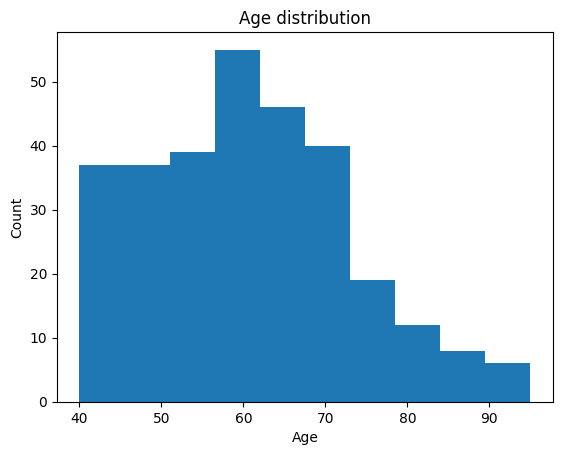

In [50]:
#what is the aged distribution of the observed data? 
plt.hist(data["age"], bins = 10, rwidth = 2)
plt.title("Age distribution")
plt.ylabel("Count")
plt.xlabel("Age")

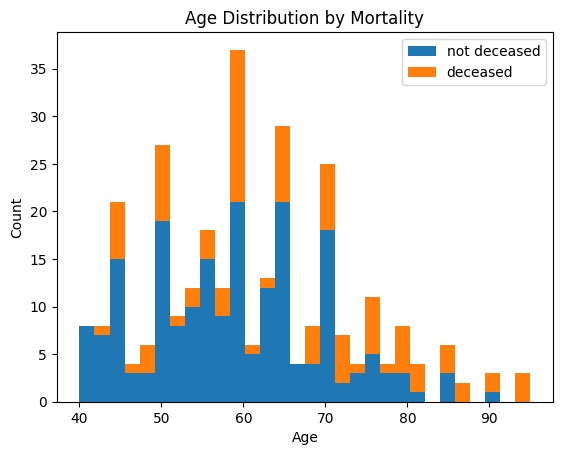

In [29]:
# I found interesting to know what is the age distribution of people with and without heart diesease. 
# plot with the raw data

import matplotlib.pyplot as plt

list1 = list()
outcomelabels = list()
labels = {0:"not deceased",1:"deceased"}
for outcome in data.death.cat.categories:
    list1.append(data[data["death"] == outcome]["age"])
    outcomelabels.append(labels[outcome])
h = plt.hist(list1, bins = 30, stacked = True, rwidth = 1, label = outcomelabels)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Mortality")
plt.legend(loc = "upper right")
plt.show()


<Figure size 1200x800 with 0 Axes>

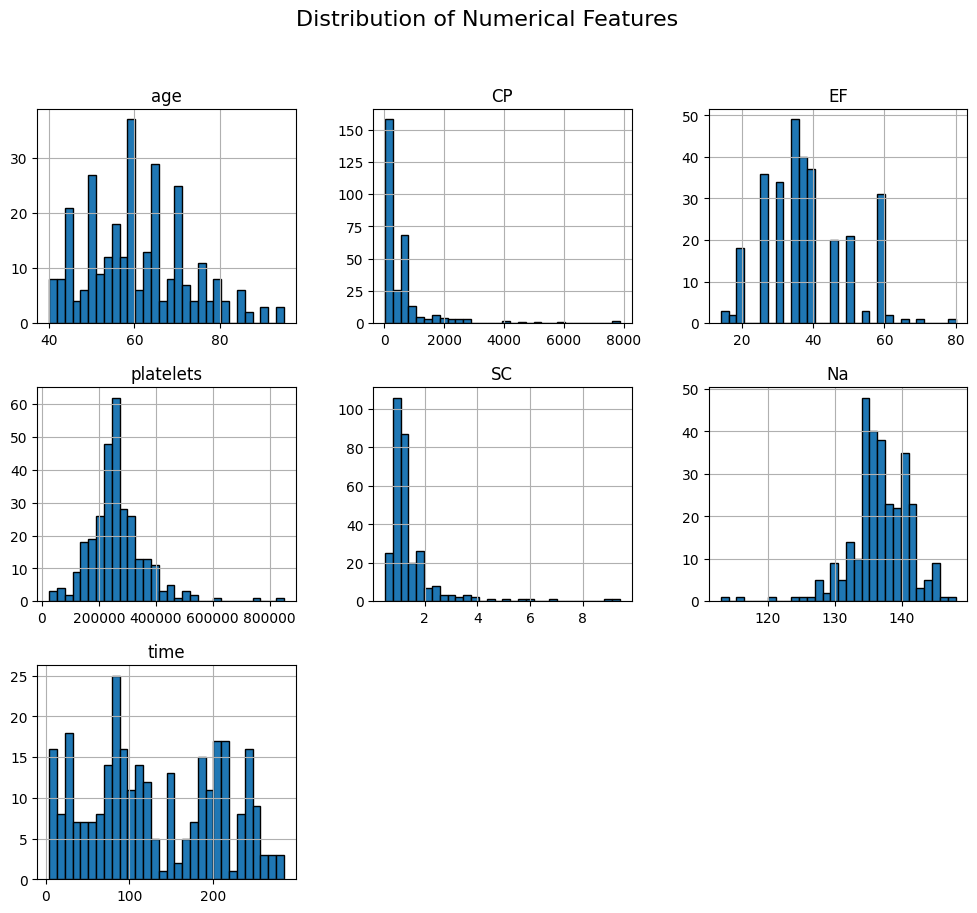

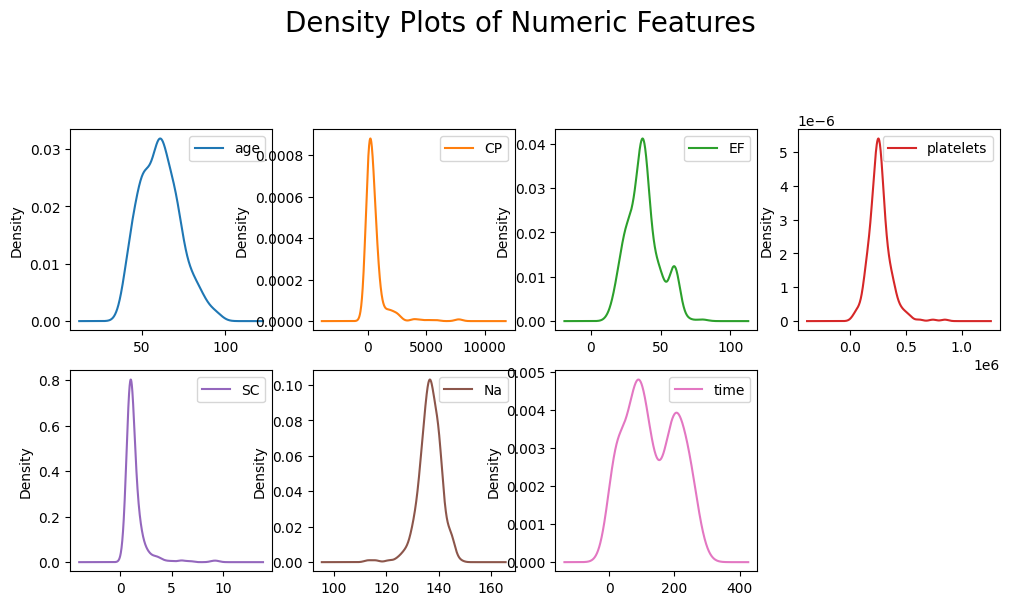

In [54]:
# make a correlation plot between the features
import matplotlib.pyplot as plt
import seaborn as sns
#set figure size
plt.figure(figsize=(12,8))

#plot histogram for each numerical column
data.hist(bins=30, figsize=(12,10), edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize = 16)
plt.show()

data.plot(kind="density", subplots=True, layout=(4,4), figsize=(12,12), sharex=False)
plt.suptitle("Density Plots of Numeric Features", fontsize = 20)
plt.show()

                age   anaemia        CP  diabetes        EF       HBP  \
age        1.000000  0.088006 -0.081584 -0.101012  0.060098  0.093289   
anaemia    0.088006  1.000000 -0.190741 -0.012729  0.031557  0.038182   
CP        -0.081584 -0.190741  1.000000 -0.009639 -0.044080 -0.070590   
diabetes  -0.101012 -0.012729 -0.009639  1.000000 -0.004850 -0.012732   
EF         0.060098  0.031557 -0.044080 -0.004850  1.000000  0.024445   
HBP        0.093289  0.038182 -0.070590 -0.012732  0.024445  1.000000   
platelets -0.052354 -0.043786  0.024463  0.092193  0.072177  0.049963   
SC         0.159187  0.052174 -0.016408 -0.046975 -0.011302 -0.004935   
Na        -0.045966  0.041882  0.059550 -0.089551  0.175902  0.037109   
sex        0.065430 -0.094769  0.079791 -0.157730 -0.148386 -0.104615   
smoking    0.018668 -0.107290  0.002421 -0.147173 -0.067315 -0.055711   
time      -0.224068 -0.141414 -0.009346  0.033726  0.041729 -0.196439   
death      0.253729  0.066270  0.062728 -0.001943 -

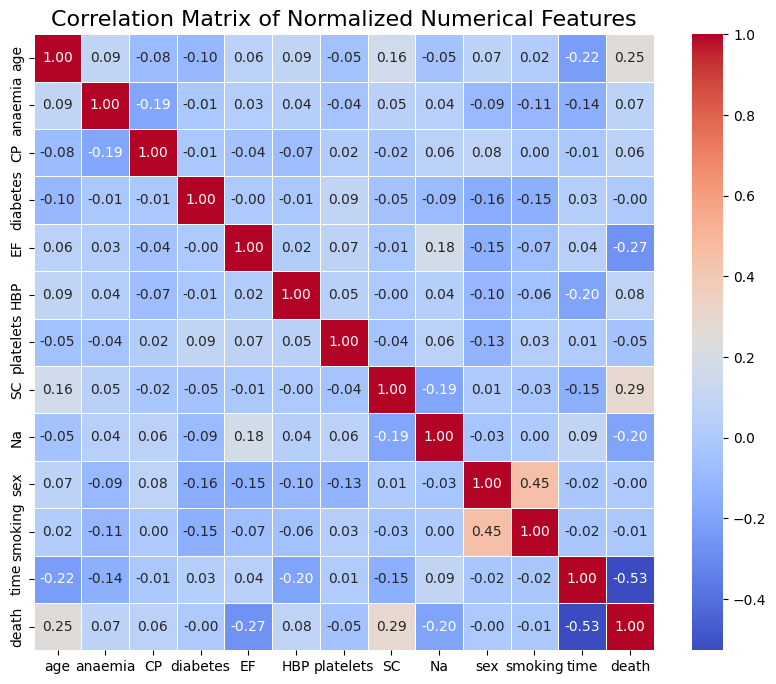

In [18]:
#NUMERICAL DATA

# normalize the data with standartscaler (actually there is no need for the normalization (the correlation function will take care about the normalisation)
# but for the practice I did the normalisation of numeric features

#copy data
norm_data = data.copy()
numeric_data = norm_data.select_dtypes(include=["float64", "int64"]).columns

#normalize only the numeric data columns using Standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_data[numeric_data]=scaler.fit_transform(norm_data[numeric_data])

#calculate the correlation matrix
correlation_matrix = norm_data.corr()
print(correlation_matrix)

#plot the correlation heatmap
#CAVE: the heatmap includes also the categorical data

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar = True, linewidths=0.5)
plt.title("Correlation Matrix of Normalized Numerical Features", fontsize =16)
plt.show()

In [56]:
# CATEGORICAL DATA

# chi-square for categorical features

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

X = data.iloc[:,:-1].values
X = data.select_dtypes(include=["category"])
y = data["death"]


#for chi2, features must be non-negative (usually integers)
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == "category":
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

chi_scores = chi2(X_encoded, y)
chi_data = pd.DataFrame({"Feature":X.columns, "Chi2 score": chi_scores[0], "p_value" : chi_scores[1]})
print(chi_data.sort_values(by = "Chi2 score", ascending=False))



#### non of the features is statistically dependent from the target feature (nor numeric neither categorical)

    Feature  Chi2 score       p_value
5     death  203.000000  4.625817e-46
2       HBP    1.221539  2.690589e-01
0   anaemia    0.746593  3.875569e-01
4   smoking    0.032347  8.572686e-01
3       sex    0.001956  9.647213e-01
1  diabetes    0.000657  9.795537e-01


In [57]:
chi_scores

(array([7.46593411e-01, 6.56814450e-04, 1.22153853e+00, 1.95626598e-03,
        3.23468288e-02, 2.03000000e+02]),
 array([3.87556925e-01, 9.79553740e-01, 2.69058926e-01, 9.64721312e-01,
        8.57268569e-01, 4.62581730e-46]))

In [61]:
# Feature selection using machine learning method:

#import all the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#split the data into the training and the test set
#the independent features were already encoded, see above 

from sklearn.model_selection import train_test_split
X = norm_data.drop("death", axis=1)
y = norm_data["death"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

# train simple linear regression
#choose a model

model = LogisticRegression()


#use RFE for feature selection
selector = RFE(model, n_features_to_select=5) #number of features is a adjustable 
selector = selector.fit(X_train, y_train)

#print the selected features
selected_features = X.columns[selector.support_]
print("Selected Features", selected_features)

#evaluate the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")

# Accuracy is 90% which is according to me just fine


Selected Features Index(['age', 'EF', 'SC', 'sex', 'time'], dtype='object')
Accuracy with selected features: 0.9000


In [66]:
# evaluate the model 
#train the model with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion = "entropy", random_state = 0)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with selecte features: {accuracy:.4f}")

Model Accuracy with selecte features: 0.8833
